In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import highlight_text 
from PIL import Image

In [3]:
league = 'Championship'
team = 'Norwich City'

In [4]:
df = pd.read_html('https://fbref.com/en/squads/1c781004/2023-2024/matchlogs/c10/shooting/Norwich-City-Match-Logs-Championship', attrs = {"id" : "matchlogs_for"})[0]

In [5]:
df_average = pd.read_html('https://fbref.com/en/comps/10/Championship-Stats', attrs = {"id" : "stats_squads_shooting_for"})[0]

In [6]:
df_average.columns = df_average.columns.droplevel()

In [7]:
average = df_average['npxG'].sum() / df_average['Sh'].sum()
average

0.09450469466482278

In [8]:
df.columns = df.columns.droplevel()

In [9]:
df.dropna(inplace = True)

In [10]:
df.rename(columns={'team_xG':'xG','opponent_xG':'xGA'}, inplace=True)

In [11]:
df['npxG/Sh'] = df['npxG']/df['Sh']

In [12]:
df['npxG/Sh MA'] = df['npxG/Sh'].rolling(window=5).mean()

In [13]:
df['Match'] = range(1, len(df) + 1) 

In [14]:
X = df['Match']
Y_for = df['npxG/Sh MA']

Text(40.65277777777777, 0.5, 'npxG/Sh')

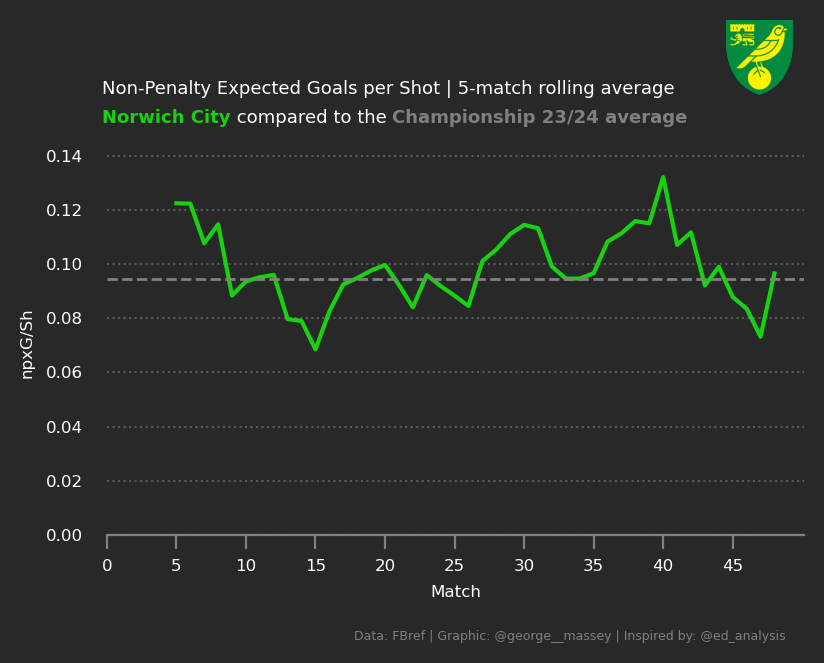

In [25]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#282828")
ax = plt.subplot(111, facecolor = "#282828")

# Remove top & right spines and change the color.
ax.spines[["top", "right","left"]].set_visible(False)
ax.tick_params(axis='y', left=False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    axis='y',
    visible = True, 
    lw = 0.75,
    ls = ":",
    alpha = 0.3,
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color = "#16D20F", zorder = 4)
line_2 = ax.axhline(y=average, color='grey', linestyle='--', linewidth=1, zorder=5, label = 'Average npxG/Sh')

 #Add a line to mark the division between seasons
#ax.plot(
 #   [22,22], # 38 games per season
  #  [ax.get_ylim()[0], ax.get_ylim()[1]],
   # ls = ":",
   # lw = 1,
   # color = "white",
   # zorder = 2
#)

# Annotation with data coordinates and offset points.
#ax.annotate(
 #   xy = (22, .4),
  #  xytext = (20, 10),
   # textcoords = "offset points",
   # text = "Playoff Rounds",
   # size = 6,
   # color = "white",
   # arrowprops=dict(
   #     arrowstyle="->", shrinkA=0, shrinkB=5, color="white", linewidth=0.75,
   #     connectionstyle="angle3,angleA=50,angleB=-30"
   # ) # Arrow to connect annotation
#)
# Fill between
#ax.fill_between(
 #   X, 
  #  average,
   # Y_for, 
   # where = Y_for >= average, 
   # interpolate = True,
   # alpha = 0.85,
   # zorder = 3,
   # color = line_1[0].get_color()
#)

#ax.fill_between(
 #   X, 
  #  average,
   ## Y_for, 
    #where = average > Y_for, 
   # interpolate = True,
   # alpha = 0.85,
   # color = line_2[0].get_color()
#)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "white",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# Set y-axis major tick positions to only 0.5 xG multiples.
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
highlight_text.fig_text(
    x = 0.12, y = 1.02,
    s = f"Non-Penalty Expected Goals per Shot | 5-match rolling average\n<{team}> compared to the <{league} 23/24 average>",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2.get_color(), "weight": "bold"}
    ],
    color = "white",
    size = 6.5,
    #annotationbbox_kw={"xycoords": "figure fraction"}
)
fig.text(0.4, -0.1, "Data: FBref | Graphic: @george__massey | Inspired by: @ed_analysis", size = 4.5, color = "grey")
badge_url = f"C:/Users/George/Documents/Football Analytics/Team Logos/{team}_logo.png"

logo_ax = fig.add_axes([0.75, .99, 0.2, 0.15], zorder=1)
club_icon = Image.open(badge_url)
logo_ax.imshow(club_icon)
logo_ax.axis("off")
ax.set_xticks(range(0, len(df['Match'])+1, 5))
ax.set_ylim(0, df['npxG/Sh MA'].max() + 0.01)
ax.set_xlabel('Match', color = "white", fontsize = 6)
ax.set_ylabel('npxG/Sh', color = "white", fontsize = 6)